#Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Bhu.csv')
##ban=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Ban.csv')
#bhu=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Bhu.csv')
#ind=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Ind.csv')
#mal=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Mal.csv')
#nep=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Nep.csv')
#pak=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Pak.csv')
#sri=pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Sri.csv')

In [ ]:
mal.corr().sort_values(['ConfirmedCases'])

<ipython-input-10-2a4fe1013862>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mal.corr().sort_values(['ConfirmedCases'])


,Unnamed: 0,tem,hum,pre,rad,ConfirmedCases
pre,-0.136810,-0.371153,0.746971,1.000000,-0.769864,-0.005458
hum,-0.094001,-0.308748,1.000000,0.746971,-0.755979,0.017293
tem,-0.087056,1.000000,-0.308748,-0.371153,0.295060,0.020028
rad,0.121503,0.295060,-0.755979,-0.769864,1.000000,0.061731
Unnamed: 0,1.000000,-0.087056,-0.094001,-0.136810,0.121503,0.129011
ConfirmedCases,0.129011,0.020028,0.017293,-0.005458,0.061731,1.000000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Ban.csv')

df = df.replace('?', np.nan)
df.isnull().sum()
df

,Unnamed: 0,time,tem,hum,pre,rad,ConfirmedCases
0,27,4/1/2011,13.876806,87.952778,0.234861,142.154167,23
1,28,5/1/2011,17.197581,89.896505,0.389516,112.755376,14
2,29,6/1/2011,19.514167,93.050000,0.746528,82.697222,1
3,30,7/1/2011,19.691532,96.967742,1.312366,29.430108,14
4,31,8/1/2011,19.675538,93.454301,1.041263,71.896505,0
...,...,...,...,...,...,...,...
142,169,2/1/2023,9.388542,87.934524,0.158780,96.328869,38
143,170,3/1/2023,10.704435,90.173387,0.255511,117.111559,39
144,171,4/1/2023,13.830278,88.704167,0.356528,120.633333,101
145,172,5/1/2023,15.889382,88.248656,0.332258,134.470430,61


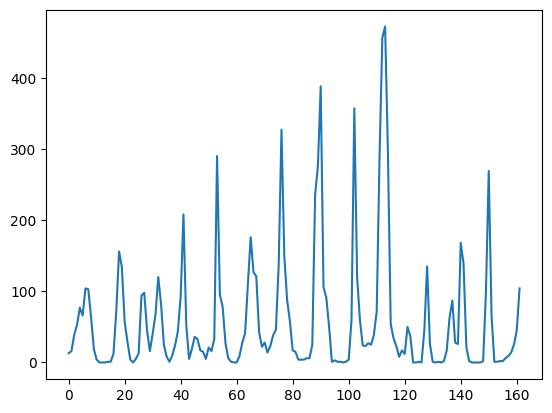

In [ ]:
plt.plot(df["ConfirmedCases"])

In [ ]:
#df.drop('Unnamed: 0', axis=1,inplace=True)
#df.drop('time', axis=1,inplace=True)

#df['time']=pd.to_datetime(df['time'])
#df.set_index('time',inplace=True)
df

,Unnamed: 0,time,tem,hum,pre,rad,ConfirmedCases
0,84,1/1/2016,-0.672715,55.935484,0.085618,116.024193,33
1,85,2/1/2016,1.346264,37.831897,0.005891,176.741379,118
2,86,3/1/2016,6.355645,68.946237,0.185081,128.155914,22
3,87,4/1/2016,11.034583,52.076389,0.090694,216.070833,7
4,88,5/1/2016,20.129973,28.978495,0.011156,260.303763,23
...,...,...,...,...,...,...,...
85,169,2/1/2023,1.787798,61.287202,0.063393,135.415179,28
86,170,3/1/2023,7.738306,56.706989,0.108199,155.744624,14
87,171,4/1/2023,12.441944,38.652778,0.036111,239.372222,1
88,172,5/1/2023,18.151210,24.763441,0.009140,248.370968,1


#GA

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install bitstring

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 11.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.layers import LSTM, Input, Dense, Dropout
from keras.models import Model

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(1120)

In [ ]:
df = df.replace('?', np.nan)
df.isnull().sum()
#df.drop(['Diff','Res','SPred'],axis=1)#'Unnamed: 0', axis=1,inplace=True)
#df_train = df.iloc[:,1:].drop(['Diff','Res','SPred'],axis=1)
df_train = df.iloc[:,2:]
df_train

,tem,hum,pre,rad,ConfirmedCases
0,-0.672715,55.935484,0.085618,116.024193,33
1,1.346264,37.831897,0.005891,176.741379,118
2,6.355645,68.946237,0.185081,128.155914,22
3,11.034583,52.076389,0.090694,216.070833,7
4,20.129973,28.978495,0.011156,260.303763,23
...,...,...,...,...,...
85,1.787798,61.287202,0.063393,135.415179,28
86,7.738306,56.706989,0.108199,155.744624,14
87,12.441944,38.652778,0.036111,239.372222,1
88,18.151210,24.763441,0.009140,248.370968,1


In [ ]:
from sklearn.preprocessing import StandardScaler
def prepare_dataset(data,w):
  sc = MinMaxScaler()
  df_train_scaled = sc.fit_transform(data)

  sc2 = MinMaxScaler()
  df_train_y = sc2.fit_transform(data[['ConfirmedCases']])

  df_train_scaled.shape
  X_train = []
  y_train = []

  for i in range(w,df_train.shape[0]):
    X_train.append(df_train_scaled[i-w:i])
    y_train.append(df_train_y[i][0])

  X_train,y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
  #X_train = X_train.reshape((X_train.shape[0],w , 1, 1, 5))

  return X_train,y_train,sc2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Now you can use MinMaxScaler in your code
sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])

sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])

In [ ]:
################ LSTM MODEL #################
# Train LSTM model and predict on validation set
#inputs = Input(shape=(window_size,5))
#x = LSTM(num_units, input_shape=(window_size,1))(inputs)
#x = Dropout(0.2)(x)
#predictions = Dense(1, activation='tanh')(x)
#model = Model(inputs=inputs, outputs=predictions)
#model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
########### Convulation LSTM + CNN ####################

#model = Sequential()
#model.add(ConvLSTM2D(filters=num_units, kernel_size=(1, 3), activation='relu', input_shape=(window_size, 1, 1, 5), padding='same', return_sequences=True))
#model.add(ConvLSTM2D(filters=num_units, kernel_size=(1, 3), activation='relu',padding='same', return_sequences=True))
#model.add(Conv2D(filters=num_units, kernel_size=(1, 3), activation='relu', padding='same'))
##model.add(Conv2D(filters=num_units, kernel_size=(1, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 3),strides=2))
#model.add(Flatten())
##model.add(Dense(units=num_units, activation='relu'))
#model.add(Dense(units=1))


NameError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Dropout, Input
import numpy as np
from sklearn.metrics import mean_squared_error
from bitstring import BitArray
from sklearn.model_selection import train_test_split

def train_evaluate(ga_individual_solution):
    # Decode GA solution to integer for window_size and num_units
    window_size_bits = BitArray(ga_individual_solution[0:4])
    num_units_bits = BitArray(ga_individual_solution[4:10])
    epo_bits = BitArray(ga_individual_solution[10:])
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    epo = epo_bits.uint

    print('\nWindow Size: ', window_size, ', Num of Units: ', num_units, ', Num of epochs: ', epo)

    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0 or epo == 0:
        return 100,

    # Segment the train_data based on new window_size; split into train and validation (80/20)
    X, Y, scale = prepare_dataset(df_train, window_size)
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)

    # Train LSTM model and predict on validation set
    #inputs = Input(shape=(window_size, 5))
    #x = LSTM(num_units, input_shape=(window_size, 1))(inputs)
    #x = Dropout(0.2)(x)
    #predictions = Dense(1, activation='tanh')(x)
    #model = Model(inputs=inputs, outputs=predictions)
    #model.compile(optimizer='adam', loss='mean_squared_error')

    model = Sequential()
    model.add(ConvLSTM2D(filters=num_units, kernel_size=(1, 3), activation='relu', input_shape=(window_size, 1, 1, 5), padding='same', return_sequences=True))
    model.add(ConvLSTM2D(filters=num_units, kernel_size=(1, 3), activation='relu',padding='same', return_sequences=True))
    model.add(Conv2D(filters=num_units, kernel_size=(1, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=num_units, kernel_size=(1, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 3),strides=2))
    model.add(Flatten())
    model.add(Dense(units=num_units, activation='relu'))
    model.add(Dense(units=1))

    # Compile and train the model
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epo, batch_size=16)
    y_pred = model.predict(X_val)
    y_pred = scale.inverse_transform(y_pred)

    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse, '\n')

    return rmse,


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv2D, MaxPooling2D, Flatten, Dense

def train_evaluate(ga_individual_solution):
    # Decode GA solution to integer for window_size and num_units
    window_size_bits = BitArray(ga_individual_solution[0:4])
    num_units_bits = BitArray(ga_individual_solution[4:10])
    epo_bits = BitArray(ga_individual_solution[10:])
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    epo = epo_bits.uint

    print('\nWindow Size: ', window_size, ', Num of Units: ', num_units, ', Num of epochs: ', epo)

    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0 or epo == 0:
        return 100,

    # Segment the train_data based on new window_size; split into train and validation (80/20)
    X,Y,scale = prepare_dataset(df_train,window_size)
    X_train, X_val, y_train, y_val = split(X, Y, test_size = 0.20)

# Train LSTM model and predict on validation set
   inputs = Input(shape=(window_size,5))
   x = LSTM(num_units, input_shape=(window_size,1))(inputs)
   x = Dropout(0.2)(x)
   predictions = Dense(1, activation='tanh')(x)
   model = Model(inputs=inputs, outputs=predictions)
   model.compile(optimizer='adam',loss='mean_squared_error')

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epo, batch_size=16)
    y_pred = model.predict(X_val)
    y_pred = scale.inverse_transform(y_pred)
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse,'\n')

    return rmse,

IndentationError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Input
import numpy as np
from bitstring import BitArray
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_evaluate(ga_individual_solution):
    # Decode GA solution to integer for window_size and num_units
    window_size_bits = BitArray(ga_individual_solution[0:4])
    num_units_bits = BitArray(ga_individual_solution[4:10])
    epo_bits = BitArray(ga_individual_solution[10:])
    window_size = window_size_bits.uint
    num_units = num_units_bits.uint
    epo = epo_bits.uint

    print('\nWindow Size: ', window_size, ', Num of Units: ', num_units, ', Num of epochs: ', epo)

    # Return fitness score of 100 if window_size or num_unit is zero
    if window_size == 0 or num_units == 0 or epo == 0:
        return 100,

    # Segment the train_data based on new window_size; split into train and validation (80/20)
    X, Y, scale = prepare_dataset(df_train, window_size)
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)

    # Train LSTM model and predict on validation set
    inputs = Input(shape=(window_size, 5))
    x = LSTM(num_units, input_shape=(window_size, 5))(inputs)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='tanh')(x)
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epo, batch_size=16)
    y_pred = model.predict(X_val)
    y_pred = scale.inverse_transform(y_pred)
    # Calculate the RMSE score as fitness score for GA
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print('Validation RMSE: ', rmse, '\n')

    return rmse,


In [ ]:

population_size = 6
num_generations = 6
gene_length = 17

# As we are trying to minimize the RMSE score, that's why using -1.0.
# In case, when you want to maximize accuracy for instance, use 1.0
creator.create('FitnessMax', base.Fitness, weights = (-1.0,))
creator.create('Individual', list , fitness = creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary,
n = gene_length)
toolbox.register('population', tools.initRepeat, list , toolbox.individual)

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

population = toolbox.population(n = population_size)
r = algorithms.eaSimple(population, toolbox, cxpb = 0.4, mutpb = 0.1, ngen = num_generations, verbose = False)


Window Size:  9 , Num of Units:  2 , Num of epochs:  113
Epoch 1/113
4/4 [==============================] - 2s 10ms/step - loss: 0.0873
Epoch 2/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0604
Epoch 3/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0729
Epoch 4/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0820
Epoch 5/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0689
Epoch 6/113
4/4 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 7/113
4/4 [==============================] - 0s 7ms/step - loss: 0.0641
Epoch 8/113
4/4 [==============================] - 0s 8ms/step - loss: 0.0626
Epoch 9/113
4/4 [==============================] - 0s 5ms/step - loss: 0.0522
Epoch 10/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0511
Epoch 11/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0452
Epoch 12/113
4/4 [==============================] - 0s 6ms/step - loss: 0.0429
Ep

1/1 [==============================] - 0s 451ms/step
Validation RMSE:  21.089095604713997 


Window Size:  4 , Num of Units:  49 , Num of epochs:  1
5/5 [==============================] - 2s 7ms/step - loss: 0.0552


1/1 [==============================] - 0s 421ms/step
Validation RMSE:  17.223246446733548 


Window Size:  3 , Num of Units:  1 , Num of epochs:  113
Epoch 1/113
5/5 [==============================] - 2s 5ms/step - loss: 0.0423
Epoch 2/113
5/5 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 3/113
5/5 [==============================] - 0s 5ms/step - loss: 0.0402
Epoch 4/113
5/5 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 5/113
5/5 [==============================] - 0s 4ms/step - loss: 0.0384
Epoch 6/113
5/5 [==============================] - 0s 4ms/step - loss: 0.0380
Epoch 7/113
5/5 [==============================] - 1s 176ms/step - loss: 0.0381
Epoch 8/113
5/5 [==============================] - 0s 5ms/step - loss: 0.0378
Epoch 9/113
5/5 [==============================] - 0s 6ms/step - loss: 0.0355
Epoch 10/113
5/5 [==============================] - 0s 6ms/step - loss: 0.0420
Epoch 11/113
5/5 [==============================] - 0s 6ms/step - l

KeyboardInterrupt: ignored

In [ ]:
#place the value of optimum parameters
w = 15
u = 24
e = 64

#GA-ConvLSTM-CNN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Mal.csv')

df = df.replace('?', np.nan)
df.isnull().sum()
df

,Unnamed: 0,time,tem,hum,pre,rad,ConfirmedCases
0,73,2/1/2015,27.044792,77.203869,0.094196,197.894345,1
1,74,3/1/2015,27.915054,74.985215,0.084140,205.302419,0
2,75,4/1/2015,28.394167,76.740278,0.065417,195.051389,0
3,76,5/1/2015,28.102285,81.596774,0.274462,156.740591,0
4,77,6/1/2015,28.404028,77.615278,0.124167,167.341667,0
...,...,...,...,...,...,...,...
96,169,2/1/2023,27.132143,75.011905,0.025893,200.925595,6
97,170,3/1/2023,27.204435,81.227151,0.174328,177.512097,33
98,171,4/1/2023,27.782639,79.548611,0.154167,200.905556,11
99,172,5/1/2023,27.788306,82.653226,0.370968,158.923387,49


In [ ]:
w = 34
u = 24
e = 120

In [ ]:
df

,Unnamed: 0,time,tem,hum,pre,rad,ConfirmedCases
0,73,2/1/2015,27.044792,77.203869,0.094196,197.894345,1
1,74,3/1/2015,27.915054,74.985215,0.084140,205.302419,0
2,75,4/1/2015,28.394167,76.740278,0.065417,195.051389,0
3,76,5/1/2015,28.102285,81.596774,0.274462,156.740591,0
4,77,6/1/2015,28.404028,77.615278,0.124167,167.341667,0
...,...,...,...,...,...,...,...
96,169,2/1/2023,27.132143,75.011905,0.025893,200.925595,6
97,170,3/1/2023,27.204435,81.227151,0.174328,177.512097,33
98,171,4/1/2023,27.782639,79.548611,0.154167,200.905556,11
99,172,5/1/2023,27.788306,82.653226,0.370968,158.923387,49


In [ ]:
df.shape

(101, 7)

In [ ]:
df_train = df.iloc[0:89,2:]
df_test = df.iloc[89:,2:]
df_test.shape

(12, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train)

sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])
df_test_y = sc2.fit_transform(df_test[['ConfirmedCases']])

df_train_scaled.shape

(89, 5)

In [ ]:

X_train = []
y_train = []

for i in range(w,89):
  X_train.append(df_train_scaled[i-w:i])
  y_train.append(df_train_y[i][0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(55, 34, 5)
(55,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], w, 1, 1, 5))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
# Add first ConvLSTM layer
model.add(ConvLSTM2D(filters=u, kernel_size=(1, 3), activation='relu', input_shape=(w, 1, 1, 5), padding='same', return_sequences=True))
# Add second ConvLSTM layer
model.add(ConvLSTM2D(filters=u, kernel_size=(1, 3), activation='relu',padding='same', return_sequences=True))
# Add first CNN layer
model.add(Conv2D(filters=u, kernel_size=(1, 3), activation='relu', padding='same'))
# Add second CNN layer
model.add(Conv2D(filters=u, kernel_size=(1, 3), activation='sigmoid', padding='same'))
# Add MaxPooling layer

#model.add(MaxPooling2D(pool_size=(2, 3),strides=2))
# Flatten the output
model.add(Flatten())
# Add fully connected layer
model.add(Dense(units=u, activation='relu'))
# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_20 (ConvLSTM2D  (None, 34, 1, 1, 24)      8448      
 )                                                               
                                                                 
 conv_lstm2d_21 (ConvLSTM2D  (None, 34, 1, 1, 24)      13920     
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 1, 1, 24)      1752      
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 1, 1, 24)      1752      
                                                                 
 flatten_10 (Flatten)        (None, 816)               0         
                                                                 
 dense_27 (Dense)            (None, 24)              

In [ ]:
history = model.fit(X_train, y_train, epochs=e, batch_size=16)

Epoch 1/120
4/4 [==============================] - 8s 74ms/step - loss: 0.6165
Epoch 2/120
4/4 [==============================] - 0s 78ms/step - loss: 0.2189
Epoch 3/120
4/4 [==============================] - 0s 123ms/step - loss: 0.2763
Epoch 4/120
4/4 [==============================] - 1s 131ms/step - loss: 0.0871
Epoch 5/120
4/4 [==============================] - 1s 127ms/step - loss: 0.0662
Epoch 6/120
4/4 [==============================] - 1s 133ms/step - loss: 0.0823
Epoch 7/120
4/4 [==============================] - 0s 124ms/step - loss: 0.0358
Epoch 8/120
4/4 [==============================] - 1s 132ms/step - loss: 0.0472
Epoch 9/120
4/4 [==============================] - 0s 115ms/step - loss: 0.0509
Epoch 10/120
4/4 [==============================] - 0s 114ms/step - loss: 0.0240
Epoch 11/120
4/4 [==============================] - 1s 130ms/step - loss: 0.0362
Epoch 12/120
4/4 [==============================] - 0s 82ms/step - loss: 0.0297
Epoch 13/120
4/4 [======================

In [ ]:
last14 = df_train.iloc[-w:]
full_df = pd.concat((last14,df_test),axis=0)
full_df = sc.fit_transform(full_df)
full_df.shape

(46, 5)

In [ ]:
last14

,tem,hum,pre,rad,ConfirmedCases
55,27.701389,79.034722,0.228194,149.969444,0
56,26.788575,81.669355,0.291935,125.077957,0
57,26.791806,84.133333,0.646806,126.177778,0
58,27.148387,82.706989,0.411694,122.103495,0
59,27.588978,78.553763,0.081048,186.401882,0
60,27.713649,78.972701,0.081322,204.057471,0
61,28.366801,74.500000,0.017608,214.301075,0
62,28.398194,77.215278,0.117222,189.700000,0
63,28.207930,82.563172,0.318952,143.760753,0
64,28.265278,79.909722,0.099722,167.981944,0


In [ ]:
test = []
for i in range(w,full_df.shape[0]):
  test.append(full_df[i-w:i])

test = np.array(test)

test.shape


(12, 34, 5)

In [ ]:
test = test.reshape((test.shape[0], w , 1, 1, 5))

In [ ]:
predictions = model.predict(test)


1/1 [==============================] - 1s 530ms/step


In [ ]:
pred = []
for i in predictions:
  pred.append(i[0])
#predictions.squeeze()
pred = sc2.inverse_transform(predictions)
pred = pred.squeeze()
pred

array([17.943438, 18.570642, 18.895239, 19.184702, 19.202408, 17.18146 ,
       14.747778, 13.011736, 12.145161, 13.335692, 13.973602, 15.724479],
      dtype=float32)

In [ ]:
actual = df_test['ConfirmedCases'].values
actual

array([ 3, 51, 59, 10, 11,  9, 22,  6, 33, 11, 49, 51])

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(actual,pred)

Evaluation metric results:-
MSE is : 509.6071523712355
MAE is : 18.400211175282795
RMSE is : 22.574480112977916
MAPE is : 105.15852457797475
R2 is : -0.2592609170563347



In [ ]:
test.shape

(12, 34, 1, 1, 5)

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (numpy array): True values.
        y_pred (numpy array): Predicted values.

    Returns:
        float: MAPE in percentage notation.
    """
    # Calculate the MAE (Mean Absolute Error)
    mae = mean_absolute_error(actual, pred)

    # Calculate the MAPE
    mape = (mae / np.mean(actual)) * 100

    return mape

mape_result = calculate_mape(actual,pred)
print(f"MAPE: {mape_result:.2f}%")

MAPE: 70.10%


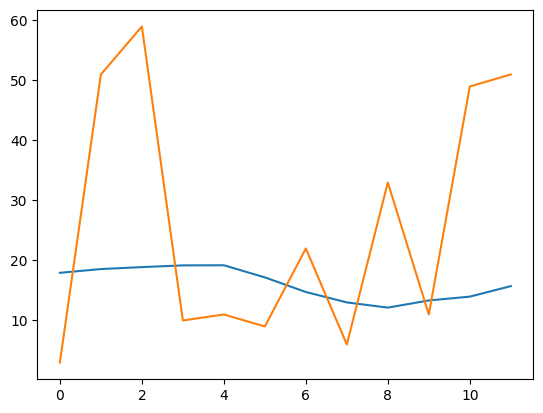

In [ ]:
plt.plot(pred)
plt.plot(actual)

#Save

In [ ]:
import csv

# Specify the file name for the CSV file
output_file = "/content/drive/MyDrive/IDO/mal_convLSTM.csv"

# Open the CSV file in write mode
with open(output_file, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header if you have one
    # writer.writerow(["Prediction"])  # Uncomment this line if you want a header

    # Write each prediction to the CSV file
    for p in pred:
        writer.writerow([p])

print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/IDO/mal_convLSTM.csv


#LSTM PART

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDO/IDO BASIC/Ban.csv')

df = df.replace('?', np.nan)
df.isnull().sum()
df

,Unnamed: 0,time,tem,hum,pre,rad,ConfirmedCases
0,12,1/1/2010,18.835349,70.544355,0.001747,151.583333,13
1,13,2/1/2010,22.713542,60.025298,0.017560,165.205357,16
2,14,3/1/2010,28.151613,61.135753,0.067876,198.939516,39
3,15,4/1/2010,30.159167,71.508333,0.146944,169.112500,53
4,16,5/1/2010,28.722715,82.881720,0.387231,107.633065,77
...,...,...,...,...,...,...,...
157,169,2/1/2023,22.188393,64.552083,0.003571,160.897321,9
158,170,3/1/2023,25.029704,69.849462,0.167204,159.264785,14
159,171,4/1/2023,28.530972,67.027778,0.055972,199.670833,25
160,172,5/1/2023,28.878763,74.444892,0.343011,158.107527,45


In [ ]:
#place the value of optimum parameters
w = 4
u = 52
e = 115

In [ ]:
df_train = df.iloc[0:150,2:]#.drop(['Diff','Res','SPred'],axis=1)
df_test = df.iloc[150:,2:]#.drop(['Diff','Res','SPred'],axis=1)
df_test.shape

(12, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train)

sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])
df_test_y = sc2.fit_transform(df_test[['ConfirmedCases']])

df_train_scaled.shape

(150, 5)

In [ ]:
X_train = []
y_train = []

for i in range(w,150):
  X_train.append(df_train_scaled[i-w:i])
  y_train.append(df_train_y[i][0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train.shape

(146, 4, 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
inputs = Input(shape=(w,5))
x = LSTM(u, input_shape=(w,1))(inputs)
predictions = Dense(1, activation='linear')(x)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=e, batch_size=10,shuffle=True)


Epoch 1/115
15/15 [==============================] - 2s 3ms/step - loss: 0.0351
Epoch 2/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 3/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 4/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 5/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 6/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 7/115
15/15 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 8/115
15/15 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 9/115
15/15 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 10/115
15/15 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 11/115
15/15 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 12/115
15/15 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 13/115
15/15 [=================

In [ ]:
test_data = df_train.iloc[-w:]
full_df = pd.concat((test_data,df_test),axis=0)
full_df = sc.fit_transform(full_df)
full_df.shape

(16, 5)

In [ ]:
test = []
for i in range(w,full_df.shape[0]):
  test.append(full_df[i-w:i])

test = np.array(test)
test.shape

(12, 4, 5)

In [ ]:
predictions = model.predict(test)

1/1 [==============================] - 0s 386ms/step


In [ ]:
pred = sc2.inverse_transform(predictions)
y_pred = pred.squeeze()
y_pred

array([ 71.589966 ,  64.7807   ,  13.686835 ,  20.207987 ,   4.547547 ,
       -17.233772 , -18.708555 ,   4.3107123,  14.59723  ,  44.101917 ,
        77.86943  ,  86.67101  ], dtype=float32)

In [ ]:
actual = df_test['ConfirmedCases'].values
actual

array([269,  66,   1,   1,   2,   2,   6,   9,  14,  25,  45, 104])

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    #print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    #print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    #print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(actual,pred)

Evaluation metric results:-
RMSE is : 59.341507487105595
MAPE is : 1019.9497713737849


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (numpy array): True values.
        y_pred (numpy array): Predicted values.

    Returns:
        float: MAPE in percentage notation.
    """
    # Calculate the MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAPE
    mape = (mae / np.mean(y_true)) * 100

    return mape

mape_result = calculate_mape(actual, pred.squeeze())
print(f"MAPE: {mape_result:.2f}%")


MAPE: 64.63%


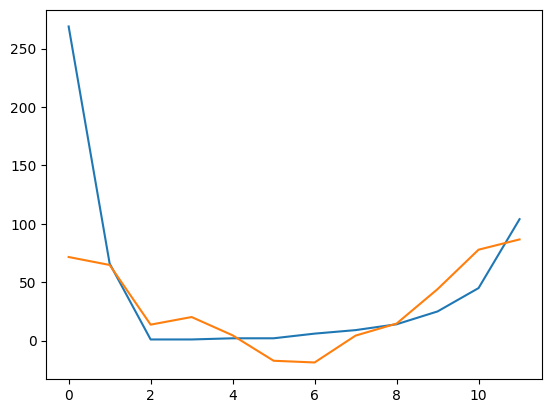

In [ ]:
plt.plot(actual)
plt.plot(y_pred)

In [ ]:
import csv

# Specify the file name for the CSV file
output_file = "/content/drive/MyDrive/IDO/ban_GA-LSTM.csv"

# Open the CSV file in write mode
with open(output_file, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header if you have one
    # writer.writerow(["Prediction"])  # Uncomment this line if you want a header

    # Write each prediction to the CSV file
    for p in y_pred:
        writer.writerow([p])

print(f"Predictions saved to {output_file}")

Predictions saved to /content/drive/MyDrive/IDO/ban_GA-LSTM.csv


#Sarima LSTM PART

In [ ]:
df

,time,tem,hum,pre,rad,ConfirmedCases,Diff,Res,SPred
0,2011-04-01,13.876806,87.952778,0.234861,142.154167,23,NaN,23.000000,NaN
1,2011-05-01,17.197581,89.896505,0.389516,112.755376,14,-9.0,-8.996415,NaN
2,2011-06-01,19.514167,93.050000,0.746528,82.697222,1,-13.0,-13.001721,NaN
3,2011-07-01,19.691532,96.967742,1.312366,29.430108,14,13.0,12.994756,NaN
4,2011-08-01,19.675538,93.454301,1.041263,71.896505,0,-14.0,-13.997039,NaN
...,...,...,...,...,...,...,...,...,...
142,2023-02-01,9.388542,87.934524,0.158780,96.328869,38,13.0,NaN,17.531595
143,2023-03-01,10.704435,90.173387,0.255511,117.111559,39,1.0,NaN,39.492933
144,2023-04-01,13.830278,88.704167,0.356528,120.633333,101,62.0,NaN,30.159267
145,2023-05-01,15.889382,88.248656,0.332258,134.470430,61,-40.0,NaN,10.006379


In [ ]:
df_train = df.iloc[0:135,1:].drop(['Diff','SPred'],axis=1)
df_test = df.iloc[135:,1:].drop(['ConfirmedCases','Diff','SPred','Res'],axis=1)

df_train.isnull().sum()
df_test

,tem,hum,pre,rad
135,20.546774,91.947581,0.698253,87.552419
136,20.549194,93.252688,0.612097,87.103495
137,18.861528,94.243056,0.600972,71.365278
138,16.285618,87.909946,0.362769,103.134409
139,12.542361,81.559722,0.011667,129.422222
140,10.004301,85.518817,0.037097,96.142473
141,8.763306,79.795699,0.033602,101.854839
142,9.388542,87.934524,0.158780,96.328869
143,10.704435,90.173387,0.255511,117.111559
144,13.830278,88.704167,0.356528,120.633333


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train[['tem','hum','pre','rad']])

sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])
#df_test_y = sc2.fit_transform(df_test[['Res']])

df_train_scaled.shape

(135, 4)

In [ ]:
w=12
X_train = []
y_train = []

for i in range(w,df_train_scaled.shape[0]):
  X_train.append(df_train_scaled[i-w:i])
  y_train.append(df_train_y[i][0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train.shape

(123, 12, 4)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input, Attention, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(w,4))
x = LSTM(60, input_shape=(w,1))(inputs)
predictions = Dense(1, activation='linear')(x)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=1000, batch_size=16)


Epoch 1/1000
8/8 [==============================] - 1s 5ms/step - loss: 0.0630
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0440
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0439
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0430
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0423
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0428
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0434
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0426
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 13/1000
8/8 [==============================

In [ ]:
test_data = df_train.iloc[-w:].drop(['Res', 'ConfirmedCases'],axis=1)
full_df = pd.concat((test_data,df_test),axis=0)
full_df = sc.fit_transform(full_df)
full_df.shape

(24, 4)

In [ ]:
test = []
for i in range(w,full_df.shape[0]):
  test.append(full_df[i-w:i])

test = np.array(test)

In [ ]:
predictions = model.predict(test)
predictions

1/1 [==============================] - 0s 462ms/step


array([[ 0.27214685],
       [ 0.20330453],
       [ 0.17494632],
       [ 0.01339397],
       [ 0.04522644],
       [-0.00516149],
       [ 0.00477263],
       [-0.01771186],
       [-0.00972927],
       [ 0.3645394 ],
       [ 0.34476504],
       [ 0.17444551]], dtype=float32)

In [ ]:
pred = sc2.inverse_transform(predictions)
pred.squeeze()

array([35.106945  , 26.226284  , 22.568075  ,  1.7278224 ,  5.8342113 ,
       -0.66583276,  0.6156692 , -2.2848294 , -1.2550763 , 47.025585  ,
       44.47469   , 22.503471  ], dtype=float32)

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    #print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    #print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    #print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(y_true,y_pred)

Evaluation metric results:-
RMSE is : 110.19854616072425
MAPE is : 57.44749804147409


In [ ]:
df.loc[df.index[-12:], 'LPred'] = pred.flatten()

In [ ]:
df['FPred']=(df.iloc[-12:]['SPred']+df.iloc[-12:]['LPred'])/2

In [ ]:
df.iloc[-12:]

,time,tem,hum,pre,rad,ConfirmedCases,Diff,Res,SPred,LPred,FPred
135,2022-07-01,20.546774,91.947581,0.698253,87.552419,1,1.0,NaN,20.686631,35.106945,27.896788
136,2022-08-01,20.549194,93.252688,0.612097,87.103495,0,-1.0,NaN,18.827289,26.226284,22.526786
137,2022-09-01,18.861528,94.243056,0.600972,71.365278,36,36.0,NaN,17.898561,22.568075,20.233318
138,2022-10-01,16.285618,87.909946,0.362769,103.134409,148,112.0,NaN,12.232904,1.727822,6.980363
139,2022-11-01,12.542361,81.559722,0.011667,129.422222,83,-65.0,NaN,-2.596501,5.834211,1.618855
140,2022-12-01,10.004301,85.518817,0.037097,96.142473,38,-45.0,NaN,2.839706,-0.665833,1.086937
141,2023-01-01,8.763306,79.795699,0.033602,101.854839,25,-13.0,NaN,21.316691,0.615669,10.966180
142,2023-02-01,9.388542,87.934524,0.158780,96.328869,38,13.0,NaN,17.531595,-2.284829,7.623383
143,2023-03-01,10.704435,90.173387,0.255511,117.111559,39,1.0,NaN,39.492933,-1.255076,19.118928
144,2023-04-01,13.830278,88.704167,0.356528,120.633333,101,62.0,NaN,30.159267,47.025585,38.592426


In [ ]:
y_true=df.iloc[-12:]['ConfirmedCases']
y_pred=df.iloc[-12:]['FPred']

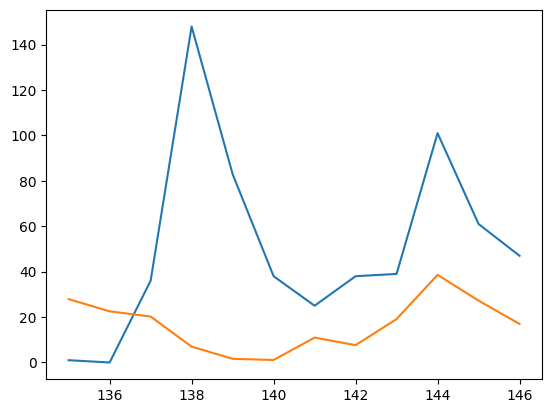

In [ ]:
plt.plot(y_true)
plt.plot(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true,y_pred))

55.37901075104216

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (numpy array): True values.
        y_pred (numpy array): Predicted values.

    Returns:
        float: MAPE in percentage notation.
    """
    # Calculate the MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate the MAPE
    mape = (mae / np.mean(y_true)) * 100

    return mape

mape_result = calculate_mape(y_true,y_pred)
print(f"MAPE: {mape_result:.2f}%")

MAPE: 83.47%


# New Save

In [ ]:
import csv

# Specify the file name for the CSV file
output_file = "/content/drive/MyDrive/IDO/bhu_SARIMA-LSTM.csv"

# Open the CSV file in write mode
with open(output_file, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the header if you have one
    # writer.writerow(["Prediction"])  # Uncomment this line if you want a header

    # Write each prediction to the CSV file
    for p in y_pred:
        writer.writerow([p])

print(f"Predictions saved to {output_file}")

Predictions saved to /content/drive/MyDrive/IDO/bhu_SARIMA-LSTM.csv


#Attention+LSTM

In [ ]:
df_train = df.iloc[0:150,1:]
df_test = df.iloc[150:,1:]
df_test.shape

(12, 5)

In [ ]:
#place the value of optimum parameters
w = 4
u = 60
e = 113

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train)

sc2 = MinMaxScaler()
df_train_y = sc2.fit_transform(df_train[['ConfirmedCases']])
df_test_y = sc2.fit_transform(df_test[['ConfirmedCases']])

df_train_scaled.shape

(150, 5)

In [ ]:
X_train = []
y_train = []

for i in range(w,150):
  X_train.append(df_train_scaled[i-w:i])
  y_train.append(df_train_y[i][0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(146, 4, 5)
(146,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train.shape

(146, 4, 5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Input, Attention, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(w,5))
x = LSTM(u, input_shape=(w,1))(inputs)
x = Dropout(0.2)(x)
attention = Attention()([x, x])  # Apply attention mechanism to the LSTM output
#attention = Dropout(0.2)(attention)
# Flatten and add a dense layer
predictions = Dense(1, activation='linear')(attention)


model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16)
#history = model.fit(X_train, y_train, epochs=150,steps_per_epoch=100,validation_data=(X_val, y_val),validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
10/10 [==============================] - 8s 7ms/step - loss: 0.0422
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0391
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0370
Epoch 4/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0358
Epoch 5/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0356
Epoch 6/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0370
Epoch 7/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 8/150
10/10 [==============================] - 0s 11ms/step - loss: 0.0370
Epoch 9/150
10/10 [==============================] - 0s 12ms/step - loss: 0.0356
Epoch 10/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 11/150
10/10 [==============================] - 0s 14ms/step - loss: 0.0362
Epoch 12/150
10/10 [==============================] - 0s 13ms/step - loss: 0.0349
Epoch 13/150
10/10 [===========

In [ ]:
last14 = df_train.iloc[-w:]
full_df = pd.concat((last14,df_test),axis=0)
full_df = sc.fit_transform(full_df)
full_df.shape

(16, 5)

In [ ]:
last14

,tem,hum,pre,rad,ConfirmedCases
146,26.427823,62.971774,0.011694,195.727150,0
147,28.782222,76.455556,0.209028,139.598611,0
148,28.111156,82.489247,0.305780,118.028226,2
149,28.368333,85.515278,0.430278,83.827778,99


In [ ]:
test = []
for i in range(w,full_df.shape[0]):
  test.append(full_df[i-w:i])

test = np.array(test)
test.shape

(12, 4, 5)

In [ ]:
predictions = model.predict(test)


1/1 [==============================] - 0s 341ms/step


In [ ]:
pred = sc2.inverse_transform(predictions)
pred.squeeze()

array([108.133286, 125.75414 ,  47.23256 ,  25.9027  ,  20.995373,
        21.025734,  18.480356,  14.357089,  19.08007 ,  39.82973 ,
        75.28634 ,  94.627   ], dtype=float32)

In [ ]:
p = []
for i in pred:
  if i[0]<0:
    k=0
  else:
    k = i[0]
  p.append(k)
p

[108.133286,
 125.75414,
 47.23256,
 25.9027,
 20.995373,
 21.025734,
 18.480356,
 14.357089,
 19.08007,
 39.82973,
 75.28634,
 94.627]

In [ ]:
actual = df_test['ConfirmedCases'].values
actual

array([269,  66,   1,   1,   2,   2,   6,   9,  14,  25,  45, 104])

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(actual,pred)

Evaluation metric results:-
MSE is : 2863.696280124261
MAE is : 33.931984186172485
RMSE is : 53.51351492963494
MAPE is : 1394.5149151219205
R2 is : 0.4780996381155983

